# Gaussian toy example

In [15]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from scipy.stats import norm

## Data

In [16]:
theta_train = np.load('../data/samples/gaussian/theta0_train.npy')
x_train = np.load('../data/samples/gaussian/x_train.npy')
log_p_train = np.log(norm.pdf(x_train, loc=theta_train, scale=(1. + theta_train**2)**0.5))
log_p_hat_train = np.load('../data/results/gaussian/maf/log_p_hat_train.npy').reshape((-1,1))
log_p_histo_train = np.load('../data/results/gaussian/histogram/log_p_hat_train.npy').reshape((-1,1))

theta_test = np.load('../data/samples/gaussian/theta0_test.npy')
x_test = np.load('../data/samples/gaussian/x_test.npy')
log_p_test = np.log(norm.pdf(x_test, loc=theta_test, scale=(1. + theta_test**2)**0.5))
log_p_hat_test = np.load('../data/results/gaussian/maf/log_p_hat_test.npy').reshape((-1,1))
log_p_histo_test = np.load('../data/results/gaussian/histogram/log_p_hat_test.npy').reshape((-1,1))

In [17]:
print(np.mean(log_p_train), np.mean(log_p_hat_train))
print(np.mean(log_p_test), np.mean(log_p_hat_test))

-1.7459429651516807 -1.7080540199937466
-1.6814683631507792 -1.6561449188109385


## Plot

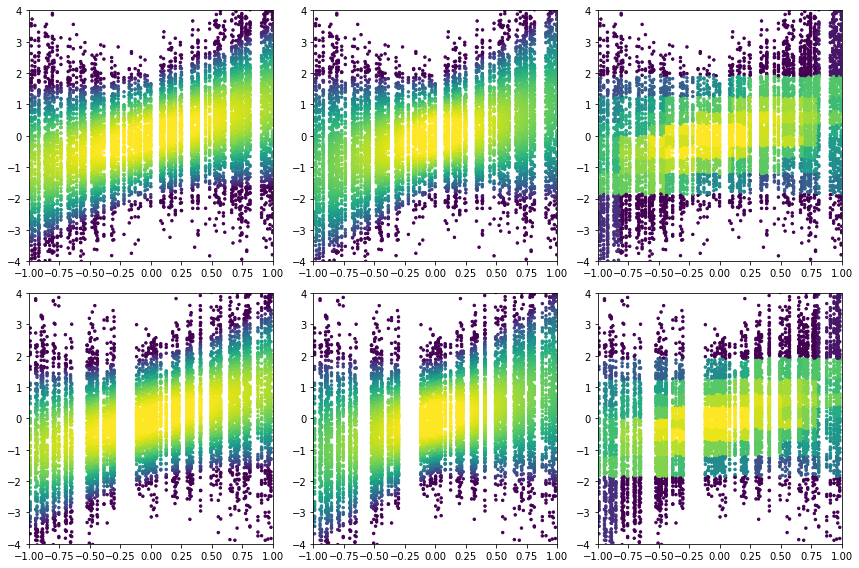

In [18]:
skip=1
fig = plt.figure(figsize=(12,8))



ax = plt.subplot(2,3,1)

plt.scatter(theta_train[::skip], x_train[::skip], c=log_p_train[::skip], cmap='viridis',
            vmin=-3., vmax=-1., s=6.)

plt.xlim(-1.,1,)
plt.ylim(-4.,4.)



ax = plt.subplot(2,3,2)

plt.scatter(theta_train[::skip], x_train[::skip], c=log_p_hat_train[::skip], cmap='viridis',
            vmin=-3., vmax=-1., s=6.)

plt.xlim(-1.,1,)
plt.ylim(-4.,4.)



ax = plt.subplot(2,3,3)

plt.scatter(theta_train[::skip], x_train[::skip], c=log_p_histo_train[::skip], cmap='viridis',
            vmin=-3., vmax=-1., s=6.)

plt.xlim(-1.,1,)
plt.ylim(-4.,4.)



ax = plt.subplot(2,3,4)

plt.scatter(theta_test, x_test, c=log_p_test, cmap='viridis', vmin=-3., vmax=-1., s=6.)

plt.xlim(-1.,1,)
plt.ylim(-4.,4.)



ax = plt.subplot(2,3,5)

plt.scatter(theta_test, x_test, c=log_p_hat_test, cmap='viridis', vmin=-3., vmax=-1., s=6.)

plt.xlim(-1.,1,)
plt.ylim(-4.,4.)



ax = plt.subplot(2,3,6)

plt.scatter(theta_test, x_test, c=log_p_histo_test, cmap='viridis', vmin=-3., vmax=-1., s=6.)

plt.xlim(-1.,1,)
plt.ylim(-4.,4.)



plt.tight_layout()
plt.show()


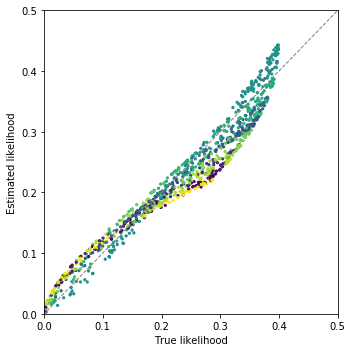

In [27]:
fig = plt.figure(figsize=(5,5))

plt.plot([-10.,10.], [-10.,10.], ls='--', lw=1., c='0.5')
plt.scatter(np.exp(log_p_test[::10]), np.exp(log_p_hat_test[::10]), c=theta_test[::10], cmap='viridis', vmin=-1., vmax=1., s=5.)

plt.xlim(0.,.5)
plt.ylim(0.,.5)
plt.xlabel('True likelihood')
plt.ylabel('Estimated likelihood')

plt.tight_layout()
plt.show()